In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("output_tasks-100000_sleep-0.5.csv", parse_dates=["start", "end"], infer_datetime_format=True)
df = df.set_index("start")[["worker"]]
df = df.groupby("worker").resample("5s").count()
df.columns = ["occurances"]
df

occurances
worker             start                          
SpawnPoolWorker-50 2021-06-23 11:50:05          16
                   2021-06-23 11:50:10          46
                   2021-06-23 11:50:15          30
                   2021-06-23 11:50:20          31
                   2021-06-23 11:50:25          34
...                                            ...
SpawnPoolWorker-56 2021-06-23 12:36:35          27
                   2021-06-23 12:36:40          28
                   2021-06-23 12:36:45          34
                   2021-06-23 12:36:50          45
                   2021-06-23 12:36:55          10

[3887 rows x 1 columns]

In [3]:
sum_occurances_df = df.reset_index()
sum_occurances_df = sum_occurances_df.groupby("start")[["occurances"]].sum()
sum_occurances_df.head()

,occurances
start,
2021-06-23 11:50:05,139
2021-06-23 11:50:10,250
2021-06-23 11:50:15,234
2021-06-23 11:50:20,244
2021-06-23 11:50:25,221


In [4]:
sum_occurances_df = sum_occurances_df.reset_index()
min_time = sum_occurances_df["start"].min()

In [5]:
sum_occurances_df["start"] = sum_occurances_df["start"].apply(lambda x: int((x - min_time).total_seconds()))
sum_occurances_df = sum_occurances_df.set_index("start")
sum_occurances_df.head()

,occurances
start,
0,139
5,250
10,234
15,244
20,221


<AxesSubplot:xlabel='start'>

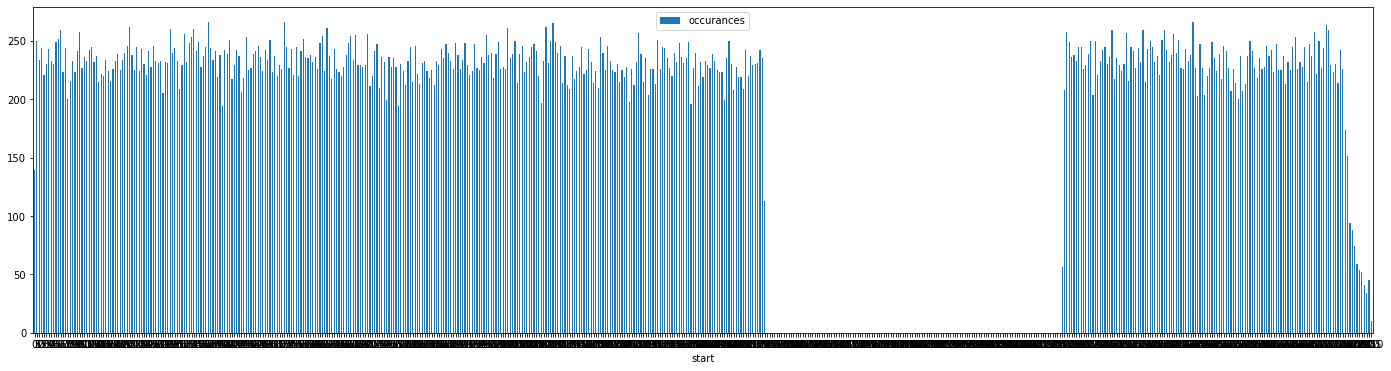

In [6]:
fig, ax = plt.subplots(figsize=(24, 6))
sum_occurances_df.plot(kind="bar", ax=ax, rot=0)

In [7]:
worker_occurances_df = df.reset_index()
worker_occurances_df = worker_occurances_df.groupby(["start", "worker"])[["occurances"]].sum()
worker_occurances_df

occurances
start               worker                        
2021-06-23 11:50:05 SpawnPoolWorker-50          16
                    SpawnPoolWorker-51          18
                    SpawnPoolWorker-52          14
                    SpawnPoolWorker-53          21
                    SpawnPoolWorker-54          27
...                                            ...
2021-06-23 12:36:40 SpawnPoolWorker-51          13
                    SpawnPoolWorker-56          28
2021-06-23 12:36:45 SpawnPoolWorker-56          34
2021-06-23 12:36:50 SpawnPoolWorker-56          45
2021-06-23 12:36:55 SpawnPoolWorker-56          10

[3887 rows x 1 columns]

In [8]:
worker_occurances_df = worker_occurances_df.reset_index()
worker_occurances_df["start"] = worker_occurances_df["start"].apply(lambda x: int((x - min_time).total_seconds()))
worker_occurances_df.head()

,start,worker,occurances
0,0,SpawnPoolWorker-50,16
1,0,SpawnPoolWorker-51,18
2,0,SpawnPoolWorker-52,14
3,0,SpawnPoolWorker-53,21
4,0,SpawnPoolWorker-54,27


In [9]:
# rigin.pivot(index='label', columns='type')['value']

In [10]:
worker_occurances_df = worker_occurances_df.pivot(index="start", columns="worker")
worker_occurances_df.head()

occurances                                        \
worker SpawnPoolWorker-50 SpawnPoolWorker-51 SpawnPoolWorker-52   
start                                                             
0                    16.0               18.0               14.0   
5                    46.0               27.0               34.0   
10                   30.0               30.0               36.0   
15                   31.0               32.0               35.0   
20                   34.0               35.0               29.0   

                                                                 \
worker SpawnPoolWorker-53 SpawnPoolWorker-54 SpawnPoolWorker-55   
start                                                             
0                    21.0               27.0               20.0   
5                    35.0               32.0               33.0   
10                   39.0               33.0               35.0   
15                   31.0               35.0               38.0   
20                   32.0               28.0               23.0   

                           
worker SpawnPoolWorker-56  
start                      
0                    23.0  
5                    43.0  
10                   31.0  
15                   42.0  
20                   40.0

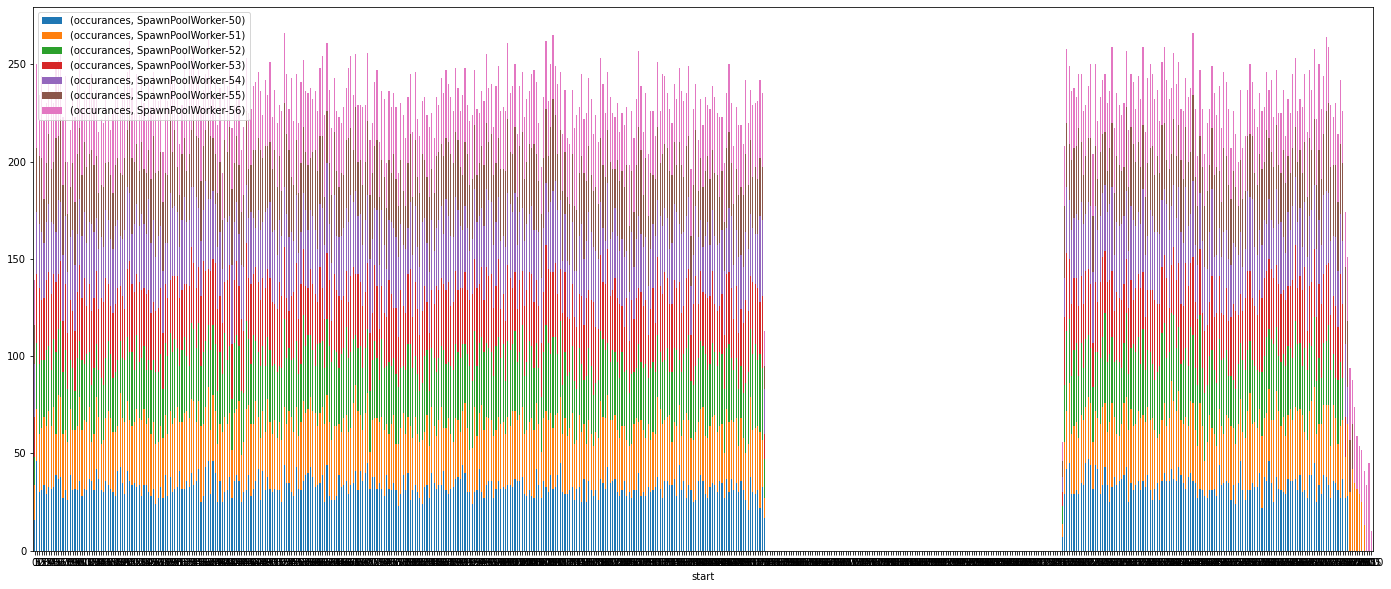

In [11]:
fig, ax = plt.subplots(figsize=(24, 10))
worker_occurances_df.plot(kind="bar", ax=ax, rot=0, stacked=True).legend(loc='upper left')